In [1]:
# importing Ben's previous output
bk.homes <- read.csv('/kaggle/input/bens-nb-brklyn-op/Bens NB BRKLNY OP.csv')

In [2]:
##Author: Ben Reddy

#model1 <- lm(log(sale.price.n) ~ log(gross.sqft),data=bk.homes)
## what's going on here?

In [3]:
bk.homes[which(bk.homes$gross.sqft==0),]

,X,borough,neighborhood,building.class.category,tax.class.at.present,block,lot,ease.ment,building.class.at.present,address,⋯,gross.square.feet,year.built,tax.class.at.time.of.sale,building.class.at.time.of.sale,sale.price,sale.date,sale.price.n,gross.sqft,land.sqft,outliers
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<lgl>,<chr>,<chr>,⋯,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>
627,1565,3,BEDFORD STUYVESANT,02 TWO FAMILY HOMES,4,1781,134,NA,V1,822 DEKALB AVENUE,⋯,0,1933,1,S2,"$690,000",2012-11-08,690000,0,1667,0
763,1757,3,BEDFORD STUYVESANT,02 TWO FAMILY HOMES,1B,1973,43,NA,V0,376 FRANKLIN AVENUE,⋯,0,1899,1,B3,"$1,387,500",2012-08-23,1387500,0,4750,0
980,2067,3,BEDFORD STUYVESANT,03 THREE FAMILY HOMES,1B,1867,36,NA,V0,166 HERKIMER STREET,⋯,0,1901,1,C0,"$165,000",2012-11-19,165000,0,1701,0
2691,8813,3,CROWN HEIGHTS,03 THREE FAMILY HOMES,1B,1140,48,NA,V0,767 BERGEN STREET,⋯,0,2007,1,C0,"$1,325,000",2013-02-20,1325000,0,5500,0
4344,14623,3,GRAVESEND,03 THREE FAMILY HOMES,1,6416,17,NA,C0,BAY 31ST STREET,⋯,0,2012,1,C0,"$1,200,000",2012-09-24,1200000,0,1,0


In [4]:
bk.homes <- bk.homes[which(bk.homes$gross.sqft>0 &
            bk.homes$land.sqft>0),]

In [5]:
model1 <- lm(log(sale.price.n) ~ log(gross.sqft),data=bk.homes)
summary(model1)


Call:
lm(formula = log(sale.price.n) ~ log(gross.sqft), data = bk.homes)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9571 -0.2934  0.1412  0.4701  3.6995 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      9.46720    0.23424   40.42   <2e-16 ***
log(gross.sqft)  0.46843    0.03033   15.45   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9366 on 6397 degrees of freedom
Multiple R-squared:  0.03595,	Adjusted R-squared:  0.0358 
F-statistic: 238.6 on 1 and 6397 DF,  p-value: < 2.2e-16


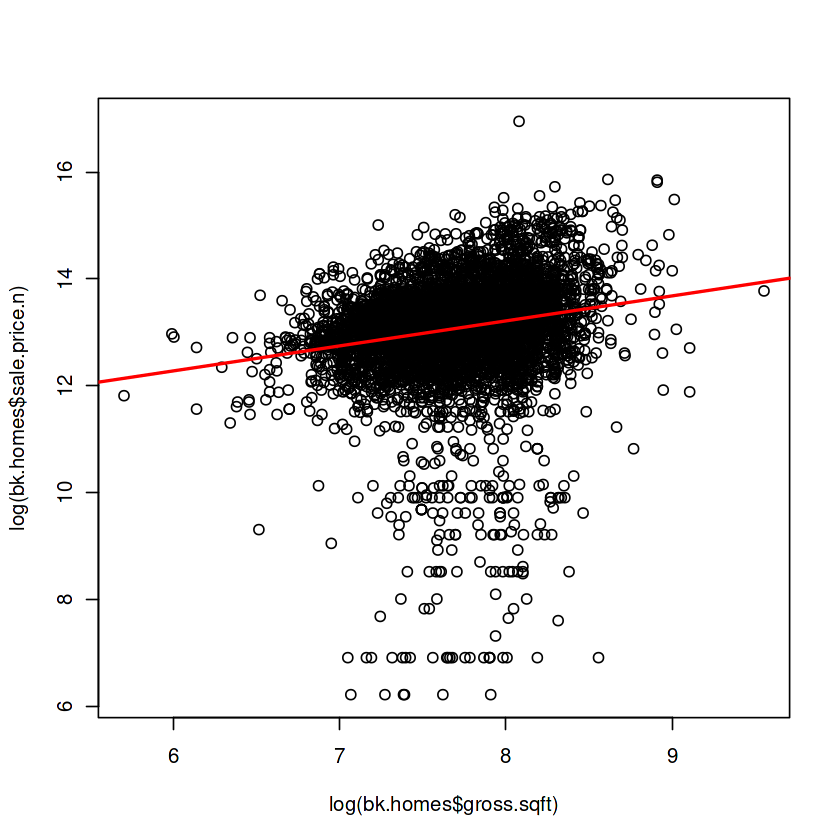

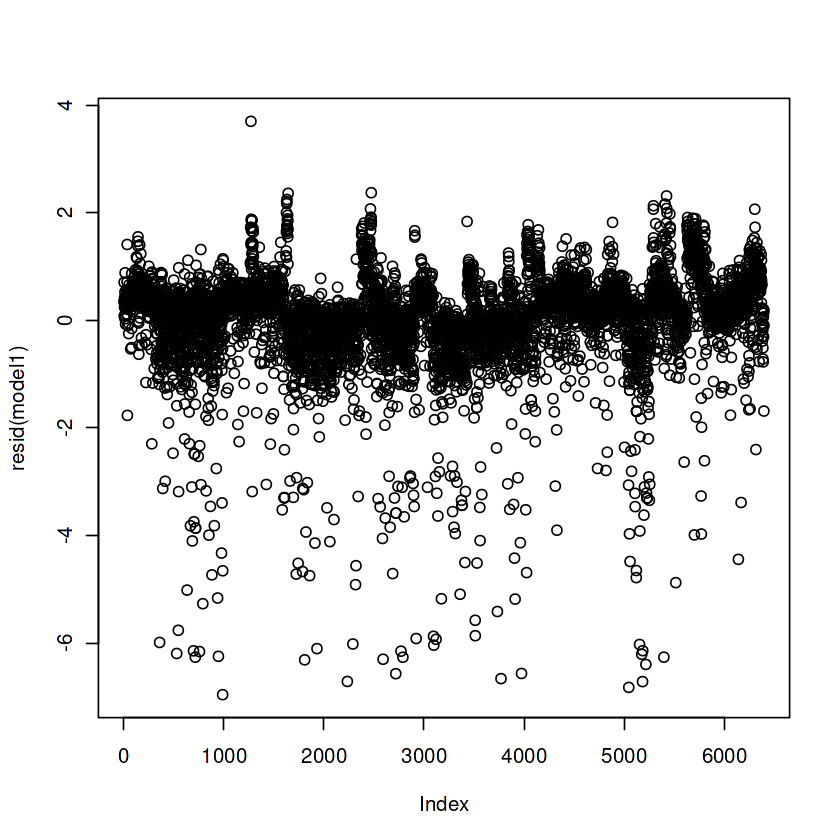

In [6]:
plot(log(bk.homes$gross.sqft),log(bk.homes$sale.price.n))
abline(model1,col="red",lwd=2)
plot(resid(model1))


Call:
lm(formula = log(sale.price.n) ~ log(gross.sqft) + log(land.sqft) + 
    factor(neighborhood), data = bk.homes)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6940 -0.1257  0.1179  0.3529  2.6101 

Coefficients:
                                               Estimate Std. Error t value
(Intercept)                                    7.976152   0.315238  25.302
log(gross.sqft)                                0.346653   0.030197  11.480
log(land.sqft)                                 0.356424   0.034731  10.262
factor(neighborhood)BAY RIDGE                  0.100998   0.097324   1.038
factor(neighborhood)BEDFORD STUYVESANT        -0.563222   0.088191  -6.386
factor(neighborhood)BENSONHURST               -0.007667   0.098753  -0.078
factor(neighborhood)BERGEN BEACH              -0.202485   0.136885  -1.479
factor(neighborhood)BOERUM HILL                1.010648   0.161705   6.250
factor(neighborhood)BOROUGH PARK               0.014240   0.094176   0.151
factor(neighborhood)BR

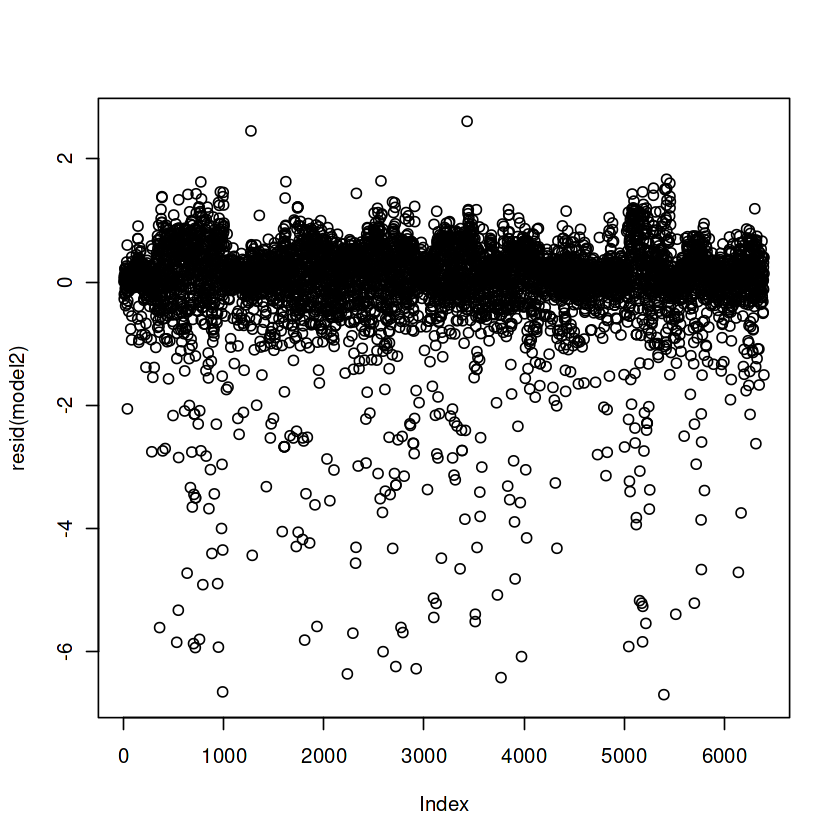

In [7]:
model2 <- lm(log(sale.price.n) ~ log(gross.sqft) +
  log(land.sqft) + factor(neighborhood),data=bk.homes)
summary(model2)
plot(resid(model2))


Call:
lm(formula = log(sale.price.n) ~ 0 + log(gross.sqft) + log(land.sqft) + 
    factor(neighborhood), data = bk.homes)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6940 -0.1257  0.1179  0.3529  2.6101 

Coefficients:
                                              Estimate Std. Error t value
log(gross.sqft)                                0.34665    0.03020  11.480
log(land.sqft)                                 0.35642    0.03473  10.262
factor(neighborhood)BATH BEACH                 7.97615    0.31524  25.302
factor(neighborhood)BAY RIDGE                  8.07715    0.30713  26.299
factor(neighborhood)BEDFORD STUYVESANT         7.41293    0.30214  24.535
factor(neighborhood)BENSONHURST                7.96849    0.30838  25.840
factor(neighborhood)BERGEN BEACH               7.77367    0.32782  23.714
factor(neighborhood)BOERUM HILL                8.98680    0.33202  27.067
factor(neighborhood)BOROUGH PARK               7.99039    0.30785  25.955
factor(neighborhood)BRIGHTON

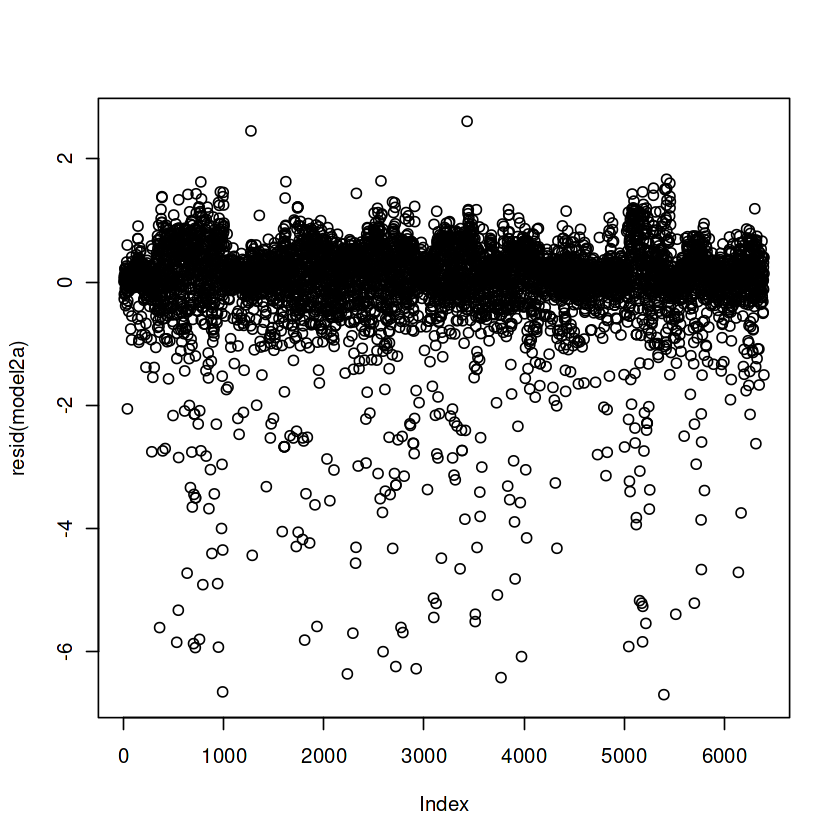

In [8]:
## leave out intercept for ease of interpretability
model2a <- lm(log(sale.price.n) ~ 0 + log(gross.sqft) +
  log(land.sqft) + factor(neighborhood),data=bk.homes)
summary(model2a)
plot(resid(model2a))


Call:
lm(formula = log(sale.price.n) ~ log(gross.sqft) + log(land.sqft) + 
    factor(neighborhood) + factor(building.class.category), data = bk.homes)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6004 -0.1255  0.1185  0.3495  2.6622 

Coefficients:
                                                                              Estimate
(Intercept)                                                                  7.618e+00
log(gross.sqft)                                                              4.104e-01
log(land.sqft)                                                               3.475e-01
factor(neighborhood)BAY RIDGE                                                7.532e-02
factor(neighborhood)BEDFORD STUYVESANT                                      -5.589e-01
factor(neighborhood)BENSONHURST                                             -1.409e-02
factor(neighborhood)BERGEN BEACH                                            -2.242e-01
factor(neighborhood)BOERUM HILL           

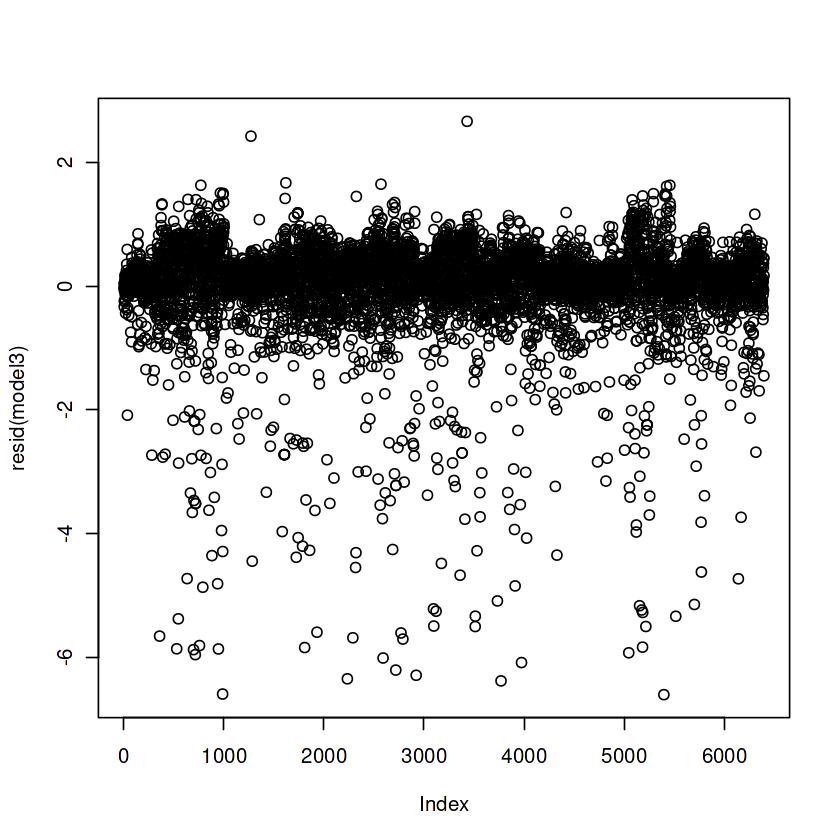

In [9]:
## add building type
model3 <- lm(log(sale.price.n) ~ log(gross.sqft) +
  log(land.sqft) + factor(neighborhood) +
  factor(building.class.category),data=bk.homes)
summary(model3)
plot(resid(model3))


Call:
lm(formula = log(sale.price.n) ~ log(gross.sqft) + log(land.sqft) + 
    factor(neighborhood) * factor(building.class.category), data = bk.homes)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6155 -0.1284  0.1119  0.3471  2.6085 

Coefficients: (9 not defined because of singularities)
                                                                                                                           Estimate
(Intercept)                                                                                                                7.905157
log(gross.sqft)                                                                                                            0.394016
log(land.sqft)                                                                                                             0.318574
factor(neighborhood)BAY RIDGE                                                                                              0.212051
factor(neighborhood)BEDFORD STUYVESAN

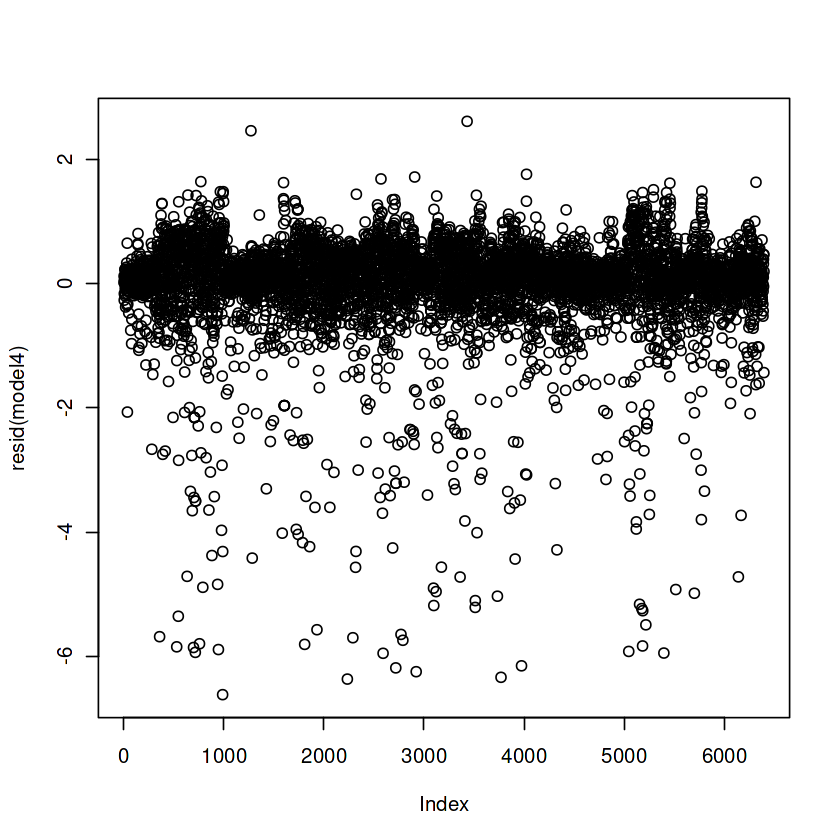

In [10]:
## interact neighborhood and building type
model4 <- lm(log(sale.price.n) ~ log(gross.sqft) +
  log(land.sqft) +  factor(neighborhood)*
  factor(building.class.category),data=bk.homes)
summary(model4)
plot(resid(model4))

In [11]:
# added by Noe to save Ben's output...
write.csv(bk.homes, "/kaggle/working/Bens BRKLYN lm OP.csv")